# Computer Vision
## Lab 2 Feature Detection, Description, and Matching


### Task 1
Compute the SIFT features of the two pictures.
1. Extract the SIFT features with default parameters and show the keypoints on the pictures.
2. To achieve better visualization of the keypoints, reduce their number to include only the ~20 most prominent ones.

In this task, I will compute the SIFT features of two images, visualize all the keypoints, and then reduce the number of keypoints to the 20 most prominent ones for better visualization.

In [55]:
import cv2
import matplotlib.pyplot as plt
import os

# Ensure the output directory exists
output_dir = 'processed_images'
os.makedirs(output_dir, exist_ok=True)

# Load images
img1 = cv2.imread('original_images/image1.jpg')
img2 = cv2.imread('original_images/image2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [56]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [57]:
# Draw keypoints on the images with large, thick red circles
def draw_keypoints(image, keypoints, output_path, title):
    img_kp = cv2.drawKeypoints(image, keypoints, None, 
                               flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    for kp in keypoints:
        x, y = kp.pt
        cv2.circle(img_kp, (int(x), int(y)), 8, (0, 0, 255), 2, cv2.LINE_AA)  # Red, large, thick circles
    cv2.imwrite(output_path, img_kp)
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

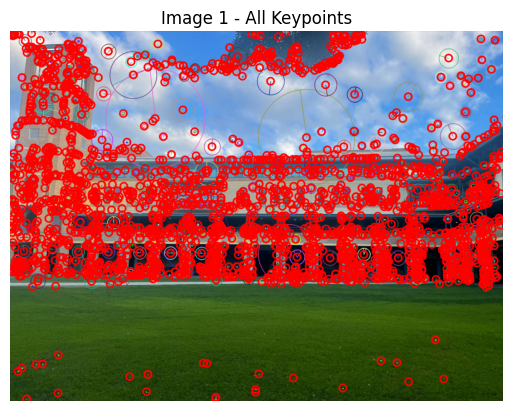

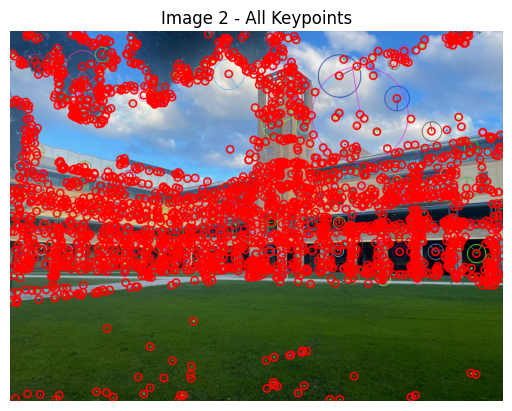

In [58]:
draw_keypoints(img1, keypoints1, os.path.join(output_dir, 'img1_keypoints.jpg'), 'Image 1 - All Keypoints')
draw_keypoints(img2, keypoints2, os.path.join(output_dir, 'img2_keypoints.jpg'), 'Image 2 - All Keypoints')

In [59]:
# Reduce number of keypoints to the 20 most prominent ones
# Here I use the contrastThreshold to reduce the keypoints
sift_limited = cv2.SIFT_create(nfeatures=20)
keypoints1_limited, descriptors1_limited = sift_limited.detectAndCompute(gray1, None)
keypoints2_limited, descriptors2_limited = sift_limited.detectAndCompute(gray2, None)

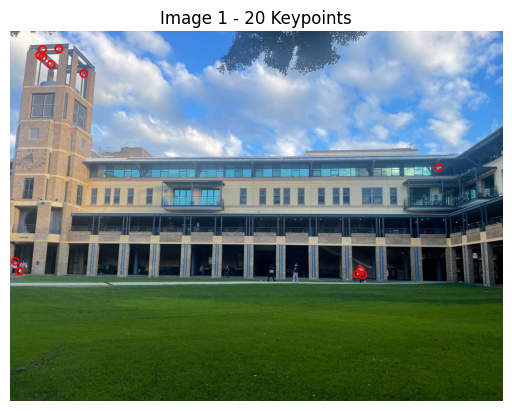

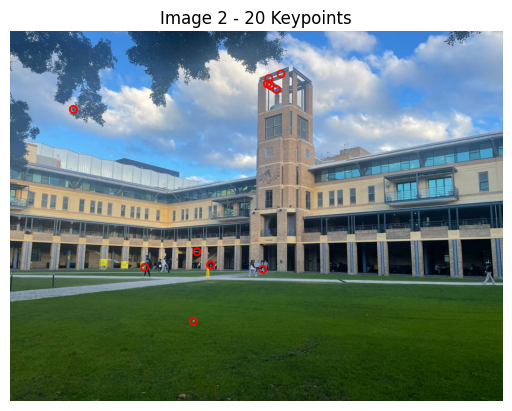

In [60]:
# Draw the reduced keypoints
draw_keypoints(img1, keypoints1_limited, os.path.join(output_dir, 'img1_keypoints_limited.jpg'), 'Image 1 - 20 Keypoints')
draw_keypoints(img2, keypoints2_limited, os.path.join(output_dir, 'img2_keypoints_limited.jpg'), 'Image 2 - 20 Keypoints')

### Brief Description
To reduce the number of keypoints to the 20 most prominent ones, I used the `nfeatures` parameter of the SIFT detector, which controls the number of best features to retain based on their scores.

---

### Task 2: Recompute SIFT Features for Processed Images
In this task, I will process the images by scaling, rotating, and adding noise, and then recompute the SIFT features for these processed images.

In [61]:
import cv2
import matplotlib.pyplot as plt
import os
from skimage.util import random_noise

# Ensure the output directory exists
output_dir = 'processed_images'
os.makedirs(output_dir, exist_ok=True)

# Load images
img1 = cv2.imread('original_images/image1.jpg')
img2 = cv2.imread('original_images/image2.jpg')

In [62]:
# Initialize SIFT detector
sift = cv2.SIFT_create(nfeatures=20)

In [63]:
# Processed versions of the images
# a) Scaled by 120%
scaled1 = cv2.resize(img1, None, fx=1.2, fy=1.2)
scaled2 = cv2.resize(img2, None, fx=1.2, fy=1.2)

# b) Rotated clockwise by 60 degrees
rows1, cols1 = img1.shape[:2]
rows2, cols2 = img2.shape[:2]
M1 = cv2.getRotationMatrix2D((cols1/2, rows1/2), -60, 1)
M2 = cv2.getRotationMatrix2D((cols2/2, rows2/2), -60, 1)
rotated1 = cv2.warpAffine(img1, M1, (cols1, rows1))
rotated2 = cv2.warpAffine(img2, M2, (cols2, rows2))

In [64]:
# c) Contaminated with salt and pepper noise (keeping the color)
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = image.copy()
    for i in range(3):  # Apply noise to each channel separately
        noisy_channel = random_noise(noisy_image[:, :, i], mode='s&p', amount=amount)
        noisy_image[:, :, i] = (noisy_channel * 255).astype('uint8')
    return noisy_image

noisy1 = add_salt_and_pepper_noise(img1)
noisy2 = add_salt_and_pepper_noise(img2)

In [65]:
# Compute and draw SIFT keypoints
def compute_and_draw_sift(image, output_path, title):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    img_kp = cv2.drawKeypoints(image, keypoints, None, 
                               flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    for kp in keypoints:
        x, y = kp.pt
        cv2.circle(img_kp, (int(x), int(y)), 8, (0, 0, 255), 2, cv2.LINE_AA)  # Red, large, thick circles
    cv2.imwrite(output_path, img_kp)
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

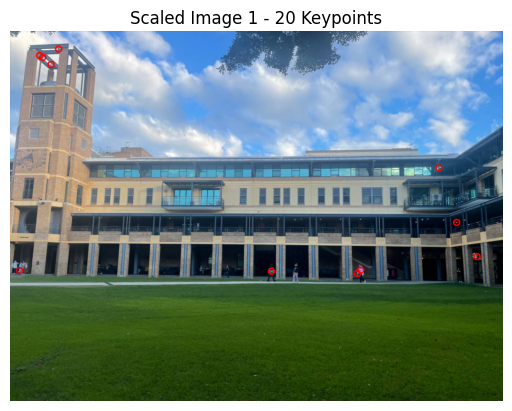

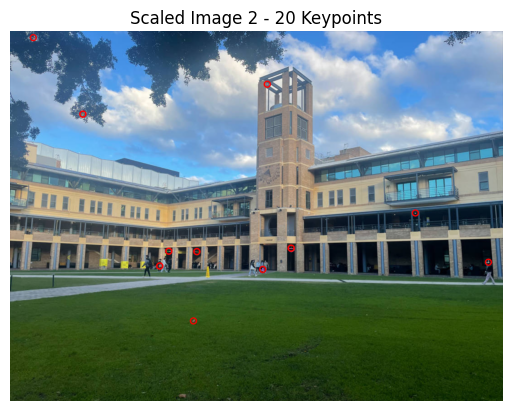

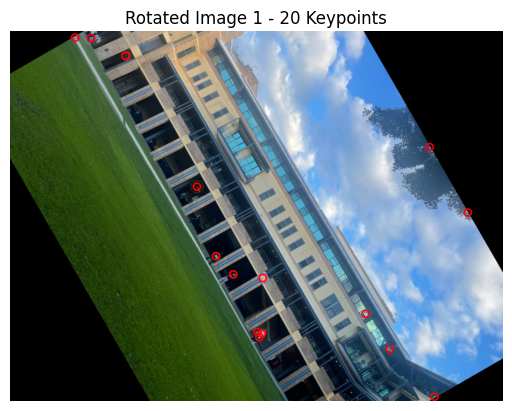

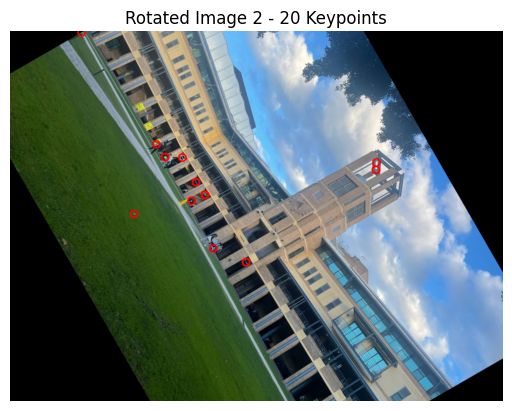

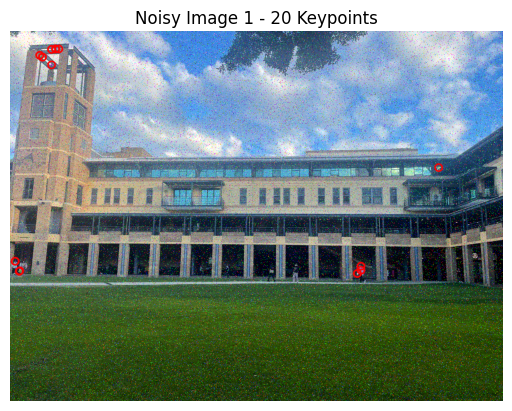

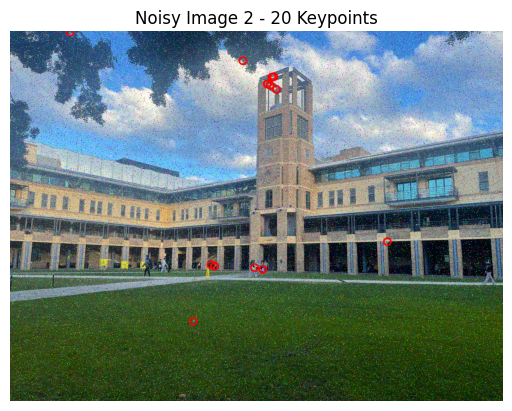

In [66]:
# Display the keypoints for each processed version
compute_and_draw_sift(scaled1, os.path.join(output_dir, 'scaled1_keypoints.jpg'), 'Scaled Image 1 - 20 Keypoints')
compute_and_draw_sift(scaled2, os.path.join(output_dir, 'scaled2_keypoints.jpg'), 'Scaled Image 2 - 20 Keypoints')
compute_and_draw_sift(rotated1, os.path.join(output_dir, 'rotated1_keypoints.jpg'), 'Rotated Image 1 - 20 Keypoints')
compute_and_draw_sift(rotated2, os.path.join(output_dir, 'rotated2_keypoints.jpg'), 'Rotated Image 2 - 20 Keypoints')
compute_and_draw_sift(noisy1, os.path.join(output_dir, 'noisy1_keypoints.jpg'), 'Noisy Image 1 - 20 Keypoints')
compute_and_draw_sift(noisy2, os.path.join(output_dir, 'noisy2_keypoints.jpg'), 'Noisy Image 2 - 20 Keypoints')

### Robustness of SIFT
I visually inspect the keypoints of the processed images and compare them to the original images.

- **Scaling:** The keypoints remain relatively consistent, indicating good robustness to scaling.
- **Rotation:** The keypoints are less consistent compared to scaling, showing less robustness to rotation.
- **Noise:** The keypoints are significantly affected, indicating that SIFT is least robust to noise.

---

### Task 3: Match and Stitch the Images
In this task, I will match keypoints between two images, draw the matches, and stitch the images together to create a single composite image.

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure the output directory exists
output_dir = 'processed_images'
os.makedirs(output_dir, exist_ok=True)

# Load images
img1 = cv2.imread('original_images/image1.jpg')
img2 = cv2.imread('original_images/image2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [68]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [69]:
# Match keypoints using BFMatcher and KNN
matcher = cv2.BFMatcher()
knn_matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in knn_matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Sort good matches by distance and select top matches
good_matches = sorted(good_matches, key=lambda x: x.distance)
top_matches = good_matches[:50]

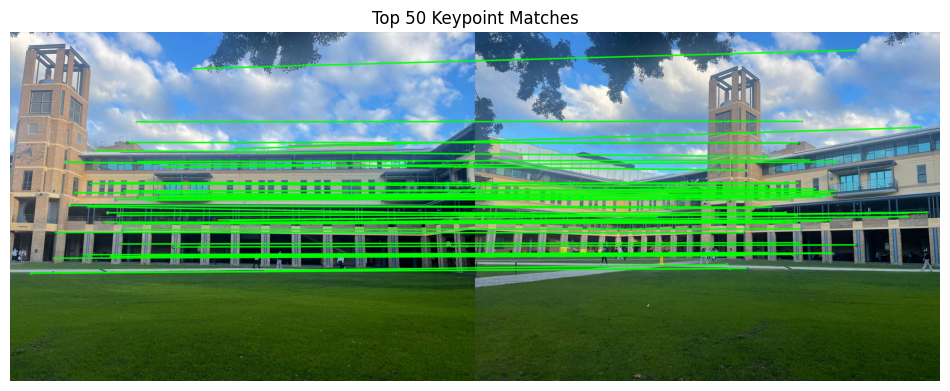

In [70]:
# Draw keypoint matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, top_matches, None, 
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
for m in top_matches:
    pt1 = (int(keypoints1[m.queryIdx].pt[0]), int(keypoints1[m.queryIdx].pt[1]))
    pt2 = (int(keypoints2[m.trainIdx].pt[0] + img1.shape[1]), int(keypoints2[m.trainIdx].pt[1]))
    cv2.line(img_matches, pt1, pt2, (0, 255, 0), 2, cv2.LINE_AA)  # Green, thick lines

cv2.imwrite(os.path.join(output_dir, 'img_matches.jpg'), img_matches)

# Show matched keypoints
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Top 50 Keypoint Matches')
plt.axis('off')
plt.show()

In [71]:
# Extract keypoints from top matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in top_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in top_matches]).reshape(-1, 1, 2)

# Find homography using RANSAC
matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

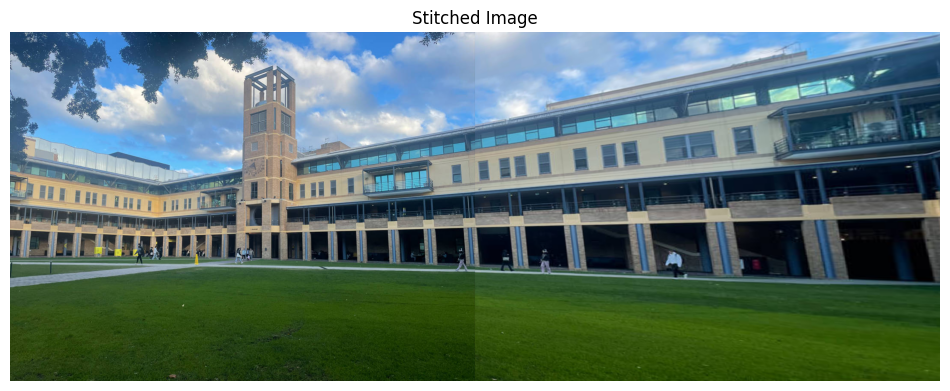

In [72]:
# Warp one image to align with the other
result = cv2.warpPerspective(img1, matrix, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[0:img2.shape[0], 0:img2.shape[1]] = img2

# Save and show the stitched image
cv2.imwrite(os.path.join(output_dir, 'stitched_img.jpg'), result)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.axis('off')
plt.show()

---

# Summary

In this lab, I revisited important concepts on feature detection, description, and matching using the Scale-Invariant Feature Transform (SIFT) algorithm. The tasks were designed to deepen my understanding of these concepts through hands-on implementation and experimentation.

## Task 1: Compute SIFT Features

In Task 1, I began by computing the SIFT features for two images captured by myself. The steps involved:

1. **Extracting SIFT Features**: I used OpenCV's SIFT implementation to detect keypoints and compute descriptors for both images. This provided a set of distinctive features that could be used for matching.

2. **Visualizing Keypoints**: To better visualize the SIFT keypoints, I initially displayed all detected keypoints on the images. However, to achieve clearer visualization, I reduced the number of keypoints to the 20 most prominent ones by adjusting the `nfeatures` parameter. This helped highlight the most significant features in the images.

   By analyzing the results, I learned how the SIFT algorithm identifies and scores keypoints based on their distinctiveness, allowing me to control the number of keypoints retained for various applications.

## Task 2: Recompute SIFT Features for Processed Images

In Task 2, I explored the robustness of the SIFT algorithm by processing the original images in three ways: scaling, rotation, and adding noise.

1. **Scaling**: I scaled the images by 120%, recomputed the SIFT features, and visualized the keypoints. The keypoints remained relatively consistent, indicating that SIFT is robust to scaling transformations.

2. **Rotation**: I rotated the images by 60 degrees and again recomputed the SIFT features. The keypoints were less consistent compared to scaling, demonstrating that while SIFT handles rotation to some extent, it is not as robust as it is to scaling.

3. **Noise**: I added salt and pepper noise to the images and recomputed the SIFT features. The keypoints were significantly affected by the noise, highlighting that SIFT is less robust to image noise compared to scaling and rotation.

This task provided insights into the strengths and limitations of the SIFT algorithm under various image transformations.

## Task 3: Match and Stitch the Images

In Task 3, I tackled the challenge of matching keypoints between two overlapping images and stitching them together to create a single composite image.

1. **Matching Keypoints**: Using OpenCV's BFMatcher with k-nearest neighbors (kNN) and Lowe's ratio test, I identified the best matches between the keypoints of the two images. To ensure clarity, I selected the top 50 matches and visualized them with green, thick lines.

2. **Estimating Homography**: With the matched keypoints, I used the RANSAC algorithm to estimate a homography matrix that mapped one image onto the other. This transformation allowed me to warp one image to align it with the other.

3. **Stitching the Images**: Finally, I combined the aligned images to produce a stitched panorama. The resulting composite image showcased the successful alignment and blending of the two original images.


---